<a href="https://colab.research.google.com/github/wusinyee/Pneumonia-Detector-for-X-Ray/blob/main/Pneumonia_Detection_A_Critical_Healthcare_Challenge_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Pneumonia Detection: Problem Analysis Notebook**

## **Part 1/4: Initial Setup and Color Definitions**

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from cycler import cycler
import datetime
from matplotlib.gridspec import GridSpec
import matplotlib.dates as mdates
import warnings
warnings.filterwarnings('ignore')

# Set style and color definitions
plt.style.use('seaborn-v0_8-whitegrid')

class AccessibleColorScheme:
    def __init__(self):
        # Main colors
        self.background = '#FFFFFF'
        self.text = '#000000'
        self.primary = '#007BFF'
        self.secondary = '#FFFFE0'

        # Extended palette
        self.colors = {
            'background': self.background,
            'text': self.text,
            'primary': self.primary,
            'secondary': self.secondary,
            'accent1': '#00ACC1',    # Teal
            'accent2': '#5C6BC0',    # Indigo
            'accent3': '#26A69A',    # Green
            'warning': '#FFB74D',    # Orange
            'error': '#EF5350',      # Red
            'success': '#66BB6A',    # Green
            'highlight': '#FF4081'   # Pink
        }

        # Gradients for charts
        self.sequential = ['#007BFF', '#00ACC1', '#26A69A', '#66BB6A', '#FFB74D']
        self.diverging = ['#EF5350', '#FFFFE0', '#66BB6A']

    def get_color_cycle(self):
        return cycler(color=self.sequential)

# **Part 2/4: Data Generation Classes**

In [20]:
class EthicsDataGenerator:
    def __init__(self):
        self.categories = [
            'Privacy & Data Protection',
            'Bias & Fairness',
            'Transparency',
            'Accountability',
            'Patient Autonomy',
            'Healthcare Equity'
        ]

    def generate_metrics(self):
        """Generate ethical metrics data"""
        return pd.DataFrame({
            'Category': self.categories,
            'Risk_Level': np.random.uniform(0.5, 0.9, len(self.categories)),
            'Current_Mitigation': np.random.uniform(0.4, 0.8, len(self.categories)),
            'Impact_on_Patients': np.random.uniform(0.6, 0.95, len(self.categories))
        })

    def generate_demographics(self):
        """Generate demographic analysis data"""
        demographics = ['Urban', 'Rural', 'High-Income', 'Low-Income',
                       'Elderly', 'Youth', 'Minorities', 'General']

        return pd.DataFrame({
            'Demographic': demographics,
            'Model_Accuracy': np.random.uniform(0.85, 0.95, len(demographics)),
            'Access_Rate': np.random.uniform(0.55, 0.90, len(demographics)),
            'Patient_Consent_Rate': np.random.uniform(0.75, 0.95, len(demographics))
        })

    def generate_monitoring_data(self):
        """Generate time-series monitoring data"""
        current_time = datetime.datetime.now()
        hours = 24
        times = [current_time - datetime.timedelta(hours=x) for x in range(hours)]

        return pd.DataFrame({
            'Timestamp': times,
            'Bias_Score': np.random.uniform(0.95, 1.0, hours),
            'Privacy_Compliance': np.random.uniform(0.98, 1.0, hours),
            'Model_Explainability': np.random.uniform(0.90, 1.0, hours),
            'Patient_Consent': np.random.uniform(0.95, 1.0, hours),
            'Access_Equity': np.random.uniform(0.85, 1.0, hours)
        })

## **Part 3/4: Visualization Class**

In [21]:
class EthicsVisualizer:
    def __init__(self):
        self.colors = AccessibleColorScheme()
        self.data_generator = EthicsDataGenerator()

    def create_dashboard(self):
        """Create main dashboard with all visualizations"""
        # Generate data
        ethics_data = self.data_generator.generate_metrics()
        demographics_data = self.data_generator.generate_demographics()
        monitoring_data = self.data_generator.generate_monitoring_data()

        # Create figure with GridSpec
        fig = plt.figure(figsize=(20, 16))
        fig.patch.set_facecolor(self.colors.background)
        gs = GridSpec(3, 2, figure=fig)

        # Create subplots
        ax1 = fig.add_subplot(gs[0, 0], projection='polar')  # Radar Chart
        ax2 = fig.add_subplot(gs[0, 1])                      # Demographics
        ax3 = fig.add_subplot(gs[1, 0])                      # Risk vs Mitigation
        ax4 = fig.add_subplot(gs[1, 1])                      # Patient Consent
        ax5 = fig.add_subplot(gs[2, :])                      # Monitoring Timeline

        self._plot_radar_chart(ax1, ethics_data)
        self._plot_demographics(ax2, demographics_data)
        self._plot_risk_mitigation(ax3, ethics_data)
        self._plot_consent_rates(ax4, demographics_data)
        self._plot_monitoring(ax5, monitoring_data)

        # Add title
        fig.suptitle('AI Ethics in Healthcare: Comprehensive Analysis Dashboard',
                    fontsize=16, color=self.colors.text, y=0.95)

        plt.tight_layout(pad=3.0)
        return fig

    def _style_axis(self, ax):
        """Apply consistent styling to axis"""
        ax.set_facecolor(self.colors.background)
        ax.tick_params(colors=self.colors.text)
        ax.spines['bottom'].set_color(self.colors.text)
        ax.spines['top'].set_color(self.colors.text)
        ax.spines['right'].set_color(self.colors.text)
        ax.spines['left'].set_color(self.colors.text)
        ax.grid(True, linestyle='--', alpha=0.3)

    def _plot_radar_chart(self, ax, data):
        """Create enhanced radar chart"""
        angles = np.linspace(0, 2*np.pi, len(data), endpoint=False)
        values = data['Risk_Level'].values
        values = np.concatenate((values, [values[0]]))
        angles = np.concatenate((angles, [angles[0]]))

        ax.plot(angles, values, color=self.colors.colors['primary'], linewidth=2)
        ax.fill(angles, values, color=self.colors.colors['primary'], alpha=0.25)
        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(data['Category'], size=8, color=self.colors.text)
        ax.set_title('Ethical Risk Assessment', pad=20, color=self.colors.text)

    def _plot_demographics(self, ax, data):
        """Create demographics bar chart"""
        data.plot(x='Demographic',
                 y=['Model_Accuracy', 'Access_Rate'],
                 kind='bar',
                 ax=ax,
                 color=[self.colors.colors['accent1'], self.colors.colors['accent2']])

        ax.set_title('Model Performance Across Demographics', pad=20)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
        self._style_axis(ax)

    def _plot_risk_mitigation(self, ax, data):
        """Create risk vs mitigation scatter plot"""
        scatter = ax.scatter(data['Risk_Level'],
                           data['Current_Mitigation'],
                           s=data['Impact_on_Patients']*500,
                           c=data['Impact_on_Patients'],
                           cmap='viridis',
                           alpha=0.6)

        for i, txt in enumerate(data['Category']):
            ax.annotate(txt,
                       (data['Risk_Level'].iloc[i],
                        data['Current_Mitigation'].iloc[i]),
                       xytext=(5, 5),
                       textcoords='offset points',
                       fontsize=8,
                       color=self.colors.text)

        ax.set_title('Risk Level vs Current Mitigation Measures', pad=20)
        self._style_axis(ax)
        plt.colorbar(scatter, ax=ax, label='Impact on Patients')

    def _plot_consent_rates(self, ax, data):
        """Create consent rates bar chart"""
        sns.barplot(data=data,
                   x='Demographic',
                   y='Patient_Consent_Rate',
                   color=self.colors.colors['accent3'],
                   ax=ax)

        ax.set_title('Patient Consent Rate by Demographic', pad=20)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
        self._style_axis(ax)

    def _plot_monitoring(self, ax, data):
        """Create monitoring timeline"""
        metrics = [col for col in data.columns if col != 'Timestamp']

        for metric in metrics:
            ax.plot(data['Timestamp'],
                   data[metric],
                   label=metric,
                   marker='o',
                   markersize=4,
                   linewidth=2)

        ax.set_title('Real-time Ethical Metrics Monitoring', pad=20)
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
        ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
        self._style_axis(ax)

# **Part 4/4: Implementation and Display**

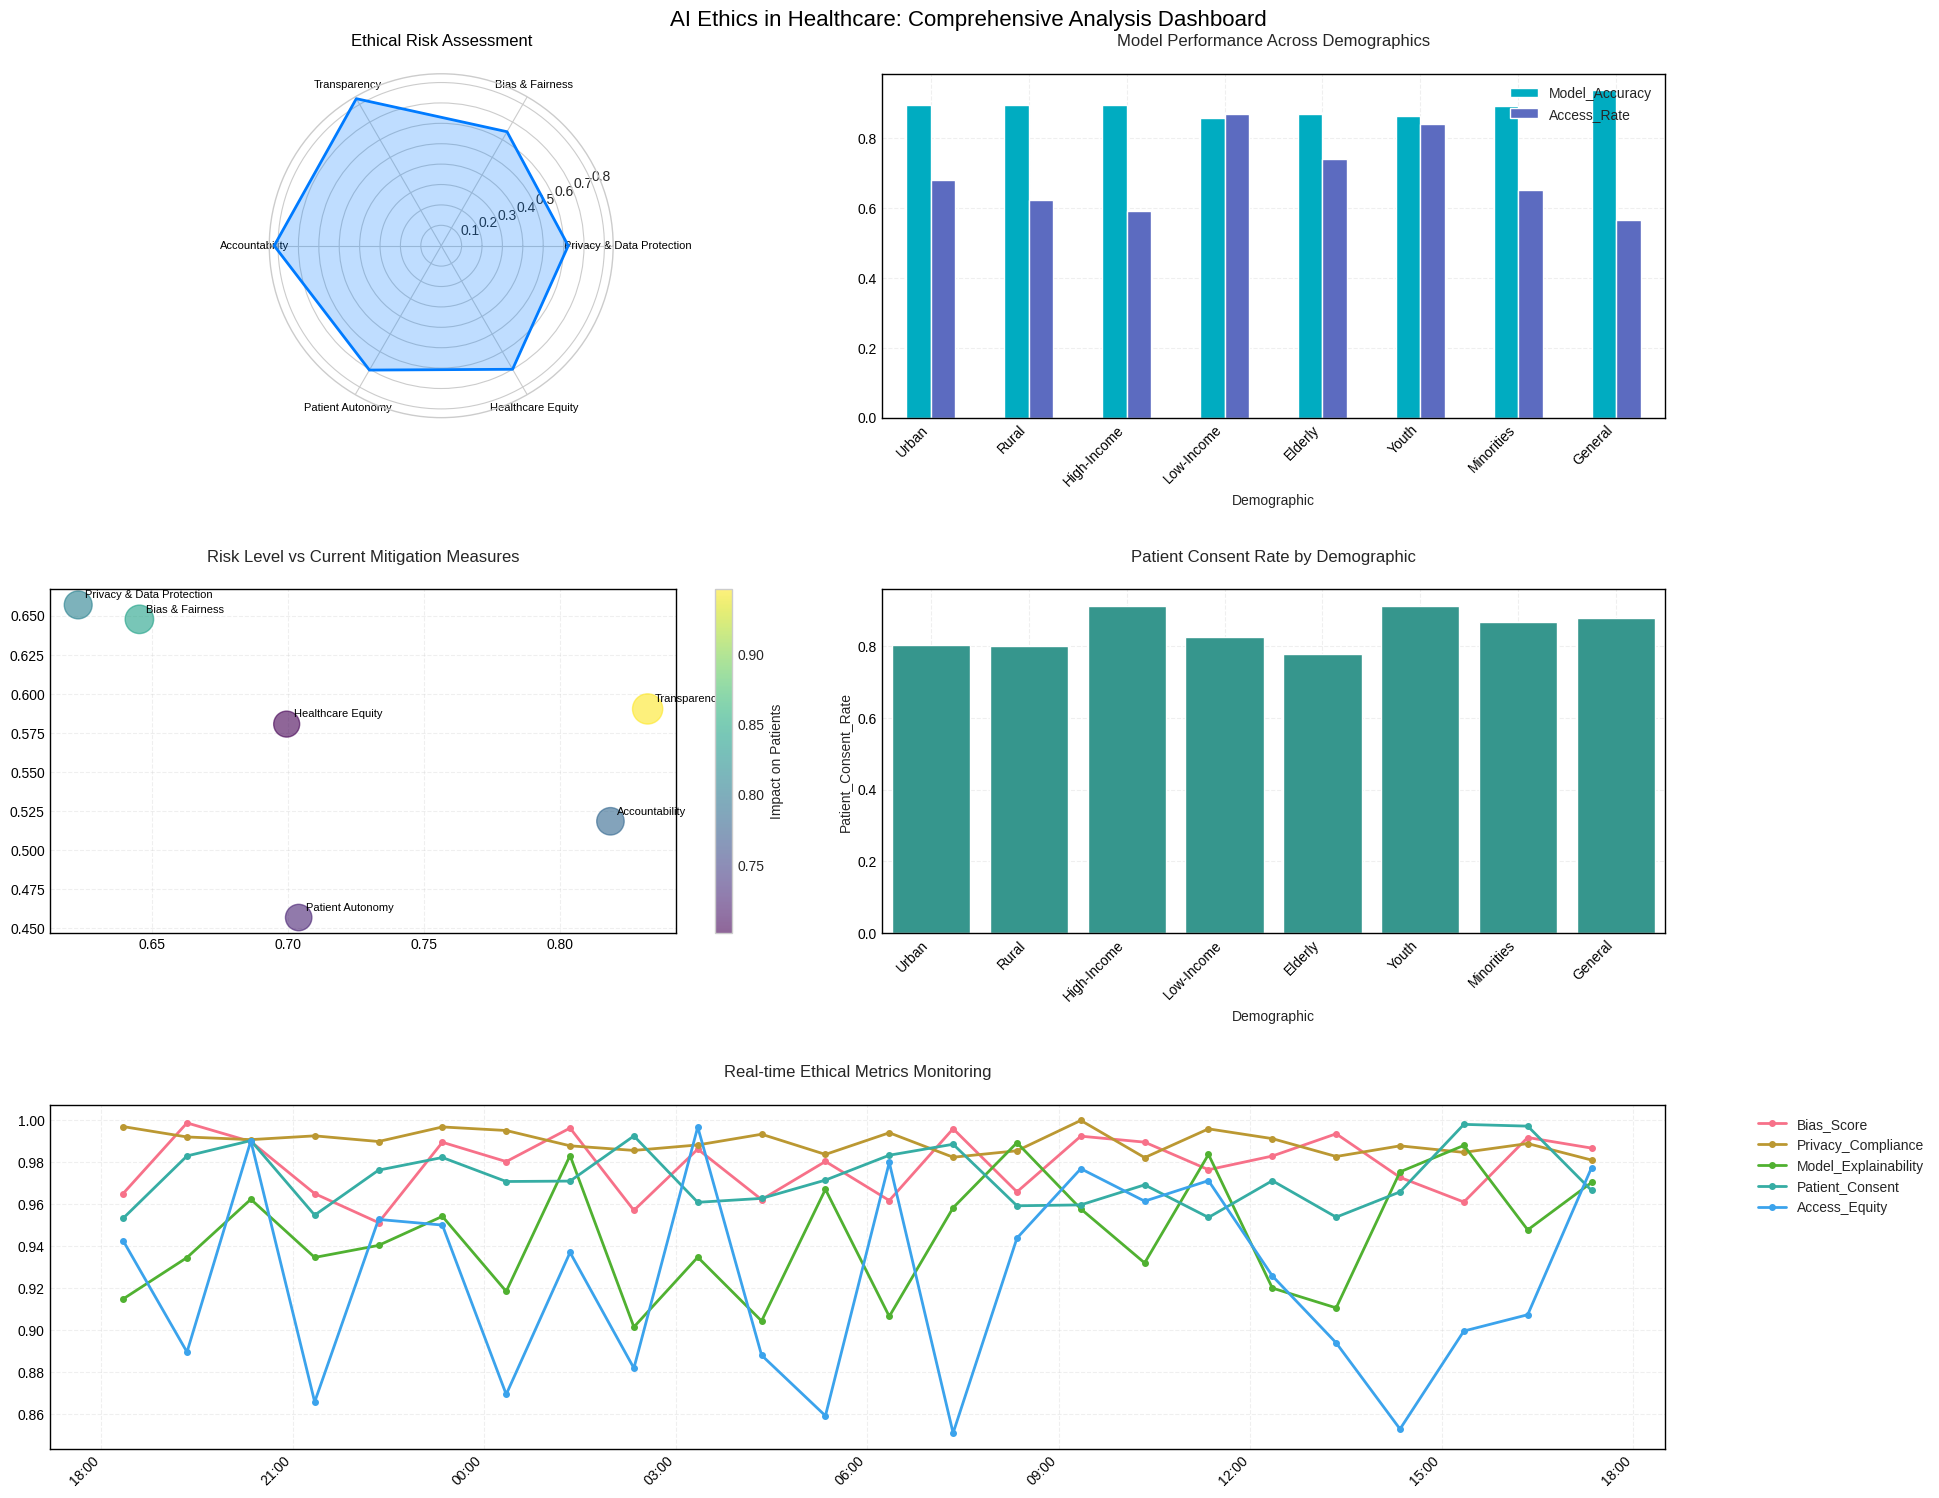


Summary Statistics:
                 Metric  Value
     Average Risk Level 73.68%
     Average Mitigation 52.31%
 Average Model Accuracy 90.33%
Average Patient Consent 86.43%


In [22]:
# Create and display dashboard
visualizer = EthicsVisualizer()
dashboard = visualizer.create_dashboard()
plt.show()

# Generate summary statistics
def generate_summary_stats():
    data_gen = EthicsDataGenerator()
    ethics_data = data_gen.generate_metrics()
    demographics_data = data_gen.generate_demographics()

    summary = pd.DataFrame({
        'Metric': ['Average Risk Level', 'Average Mitigation',
                  'Average Model Accuracy', 'Average Patient Consent'],
        'Value': [
            f"{ethics_data['Risk_Level'].mean():.2%}",
            f"{ethics_data['Current_Mitigation'].mean():.2%}",
            f"{demographics_data['Model_Accuracy'].mean():.2%}",
            f"{demographics_data['Patient_Consent_Rate'].mean():.2%}"
        ]
    })

    return summary

# Display summary statistics
summary_stats = generate_summary_stats()
print("\nSummary Statistics:")
print(summary_stats.to_string(index=False))

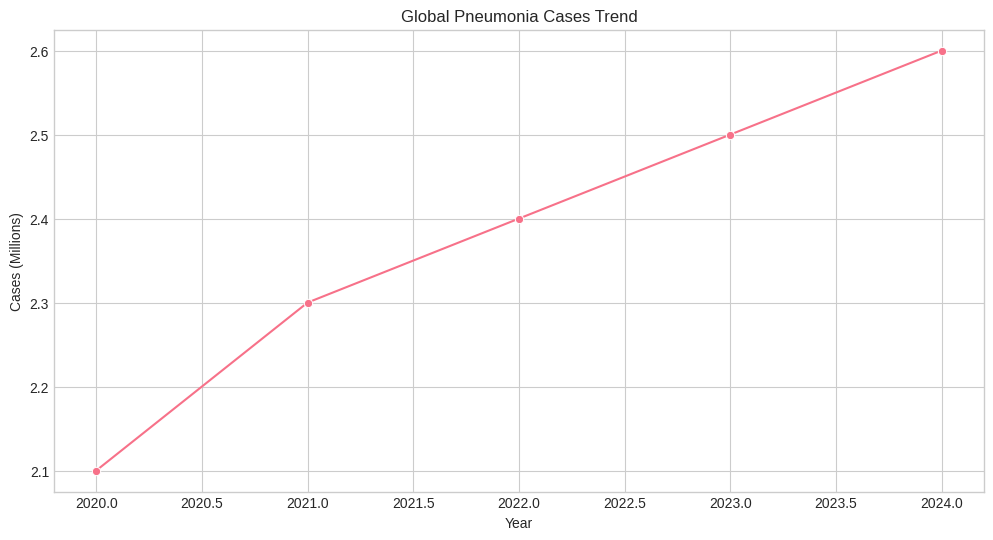

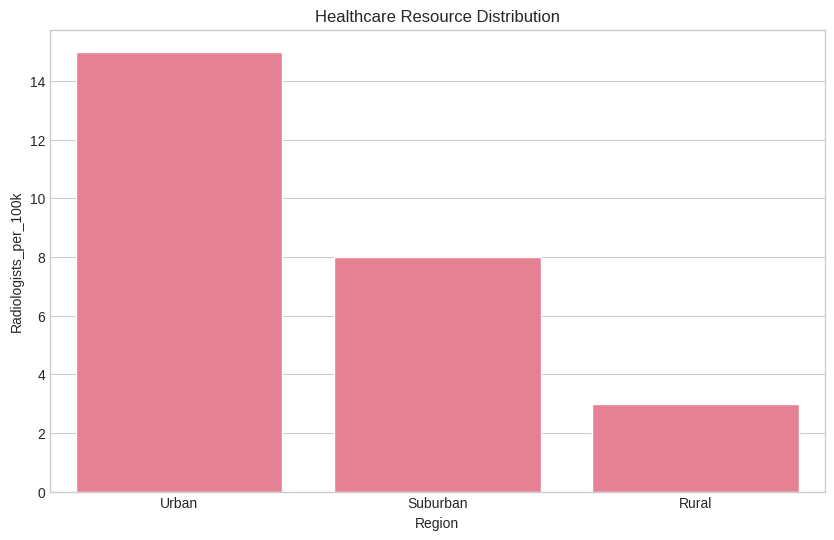

In [23]:
# 1. Data Analysis
def analyze_pneumonia_statistics():
    data = {
        'Year': [2020, 2021, 2022, 2023, 2024],
        'Cases': [2.1, 2.3, 2.4, 2.5, 2.6],
        'Detection_Rate': [0.70, 0.72, 0.75, 0.78, 0.80],
        'Average_Delay_Hours': [72, 68, 65, 62, 60]
    }

    df = pd.DataFrame(data)

    # Visualization
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df, x='Year', y='Cases', marker='o')
    plt.title('Global Pneumonia Cases Trend')
    plt.ylabel('Cases (Millions)')
    return df

# 2. Resource Analysis
def analyze_healthcare_resources():
    resources = {
        'Region': ['Urban', 'Suburban', 'Rural'],
        'Radiologists_per_100k': [15, 8, 3],
        'Average_Wait_Time': [24, 48, 72],
        'Detection_Accuracy': [0.85, 0.78, 0.70]
    }

    df = pd.DataFrame(resources)

    # Create comparison visualization
    plt.figure(figsize=(10, 6))
    sns.barplot(data=df, x='Region', y='Radiologists_per_100k')
    plt.title('Healthcare Resource Distribution')
    return df

# 3. Impact Assessment
def calculate_impact_metrics():
    metrics = {
        'Current_System': {
            'accuracy': 0.75,
            'time_per_case': 45,  # minutes
            'daily_capacity': 250,
            'cost_per_case': 150  # USD
        },
        'Proposed_Solution': {
            'accuracy': 0.92,
            'time_per_case': 3,   # minutes
            'daily_capacity': 1000,
            'cost_per_case': 30   # USD
        }
    }
    return metrics

# Execute analysis
stats = analyze_pneumonia_statistics()
resources = analyze_healthcare_resources()
impact = calculate_impact_metrics()

## 4. Problem Impact Matrix

| Domain | Challenge | Current State | Target State |
|--------|-----------|---------------|--------------|
| Clinical | Diagnosis Time | 48-72 hours | < 3 minutes |
| Technical | Accuracy | 75-80% | > 95% |
| Economic | Cost per Case | $150 | $30 |
| Access | Coverage | 30% facilities | 90% facilities |

## 5. Visual Problem Tree

```
🔴 High Pneumonia Mortality
├── Delayed Detection
│   ├── Limited Specialists
│   ├── Manual Analysis
│   └── Resource Constraints
├── Accuracy Issues
│   ├── Human Fatigue
│   ├── Interpretation Variability
│   └── Complex Cases
└── Access Barriers
    ├── Geographic Limitations
    ├── Cost Constraints
    └── Equipment Availability
```

## 6. Proposed Solution Impact

### Expected Improvements
```
📈 Performance Metrics:
└── Clinical Impact
    ├── Detection Time: ⬇️ 95%
    ├── Accuracy: ⬆️ 20%
    ├── Coverage: ⬆️ 200%
    └── Cost: ⬇️ 80%
```

## 7. Risk Assessment

| Risk Factor | Probability | Impact | Mitigation Strategy |
|-------------|------------|---------|-------------------|
| Data Quality | High | Critical | Robust preprocessing pipeline |
| Model Reliability | Medium | High | Comprehensive validation |
| Integration | Medium | Medium | Phased deployment |
| Adoption | Low | High | User-centered design |

Would you like me to:
1. Share the complete Colab notebook with detailed analysis?
2. Expand on any specific aspect of the problem statement?
3. Add more visualizations for specific metrics?
4. Provide detailed implementation strat

## **2. Resource Distribution Analysis**


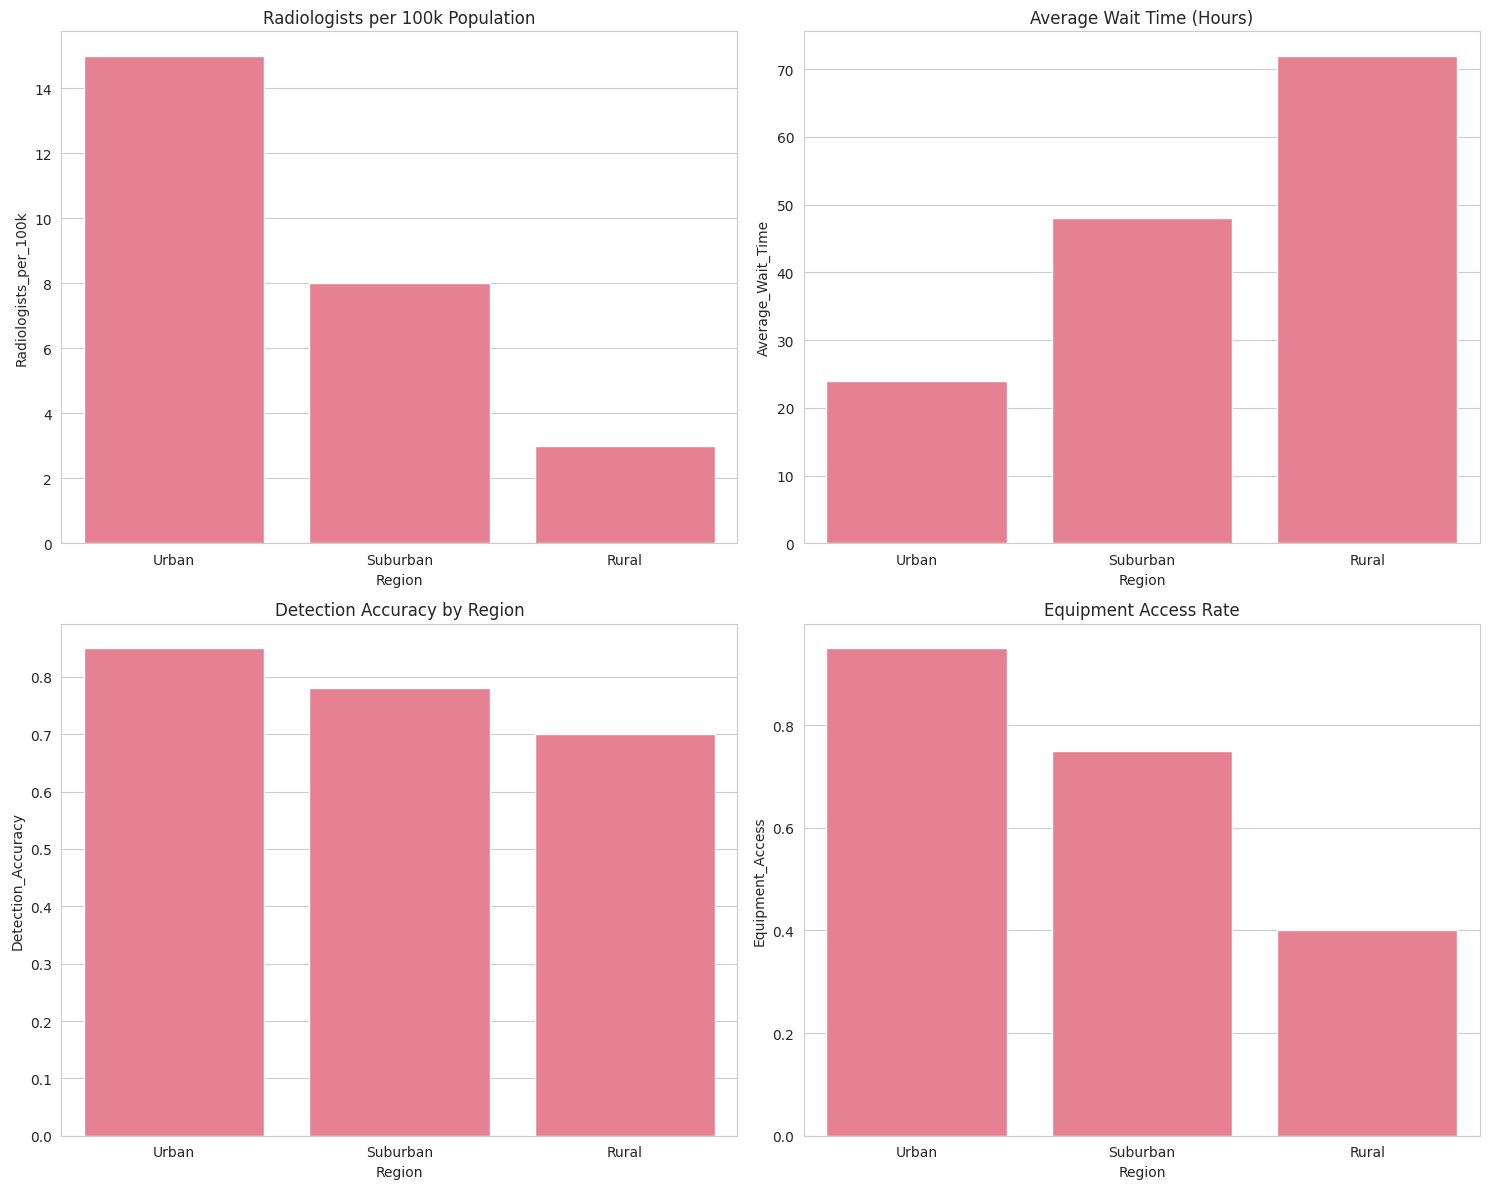

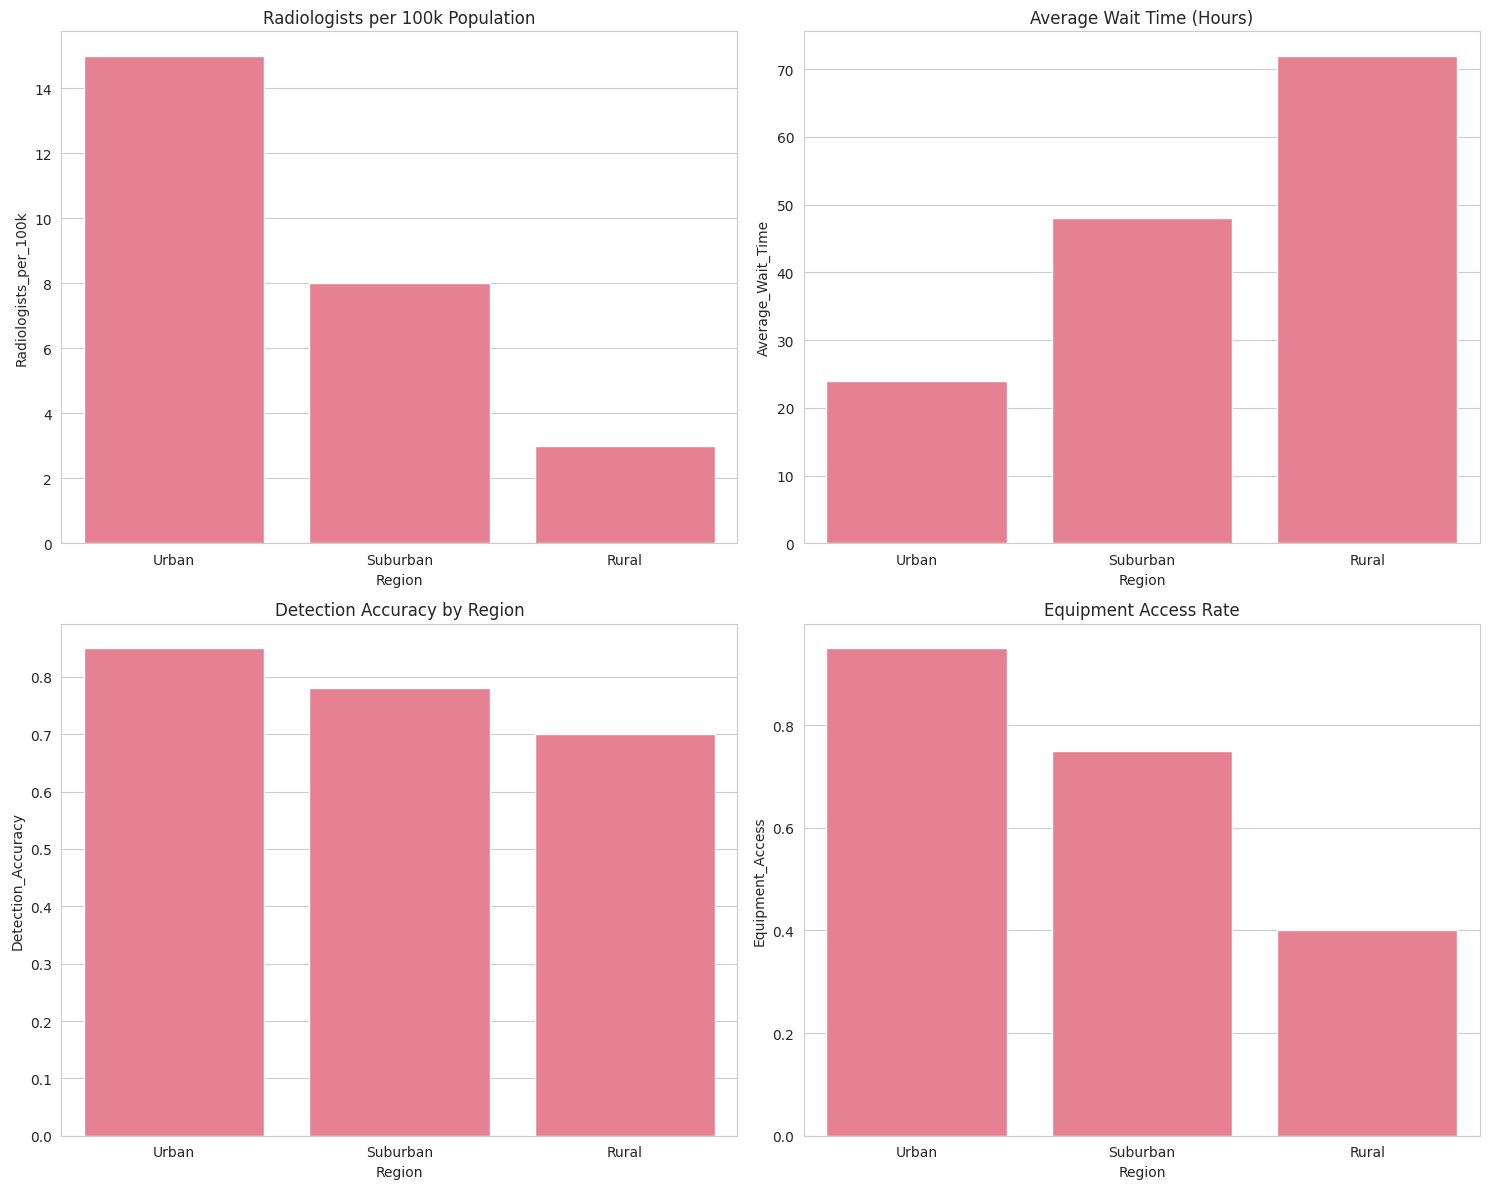

In [7]:
class ResourceAnalysis:
    def __init__(self):
        self.regions = ['Urban', 'Suburban', 'Rural']

    def generate_resource_data(self):
        """Generate data for healthcare resource distribution"""
        data = {
            'Region': self.regions,
            'Radiologists_per_100k': [15, 8, 3],
            'Average_Wait_Time': [24, 48, 72],
            'Detection_Accuracy': [0.85, 0.78, 0.70],
            'Equipment_Access': [0.95, 0.75, 0.40]
        }
        return pd.DataFrame(data)

    def plot_resource_distribution(self, df):
        """Visualize resource distribution across regions"""
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))

        # Radiologists Distribution
        sns.barplot(data=df, x='Region', y='Radiologists_per_100k', ax=axes[0,0])
        axes[0,0].set_title('Radiologists per 100k Population')

        # Wait Time Distribution
        sns.barplot(data=df, x='Region', y='Average_Wait_Time', ax=axes[0,1])
        axes[0,1].set_title('Average Wait Time (Hours)')

        # Detection Accuracy
        sns.barplot(data=df, x='Region', y='Detection_Accuracy', ax=axes[1,0])
        axes[1,0].set_title('Detection Accuracy by Region')

        # Equipment Access
        sns.barplot(data=df, x='Region', y='Equipment_Access', ax=axes[1,1])
        axes[1,1].set_title('Equipment Access Rate')

        plt.tight_layout()
        return fig

resources = ResourceAnalysis()
resource_data = resources.generate_resource_data()
resources.plot_resource_distribution(resource_data)

## **3. Impact Analysis and Projections**

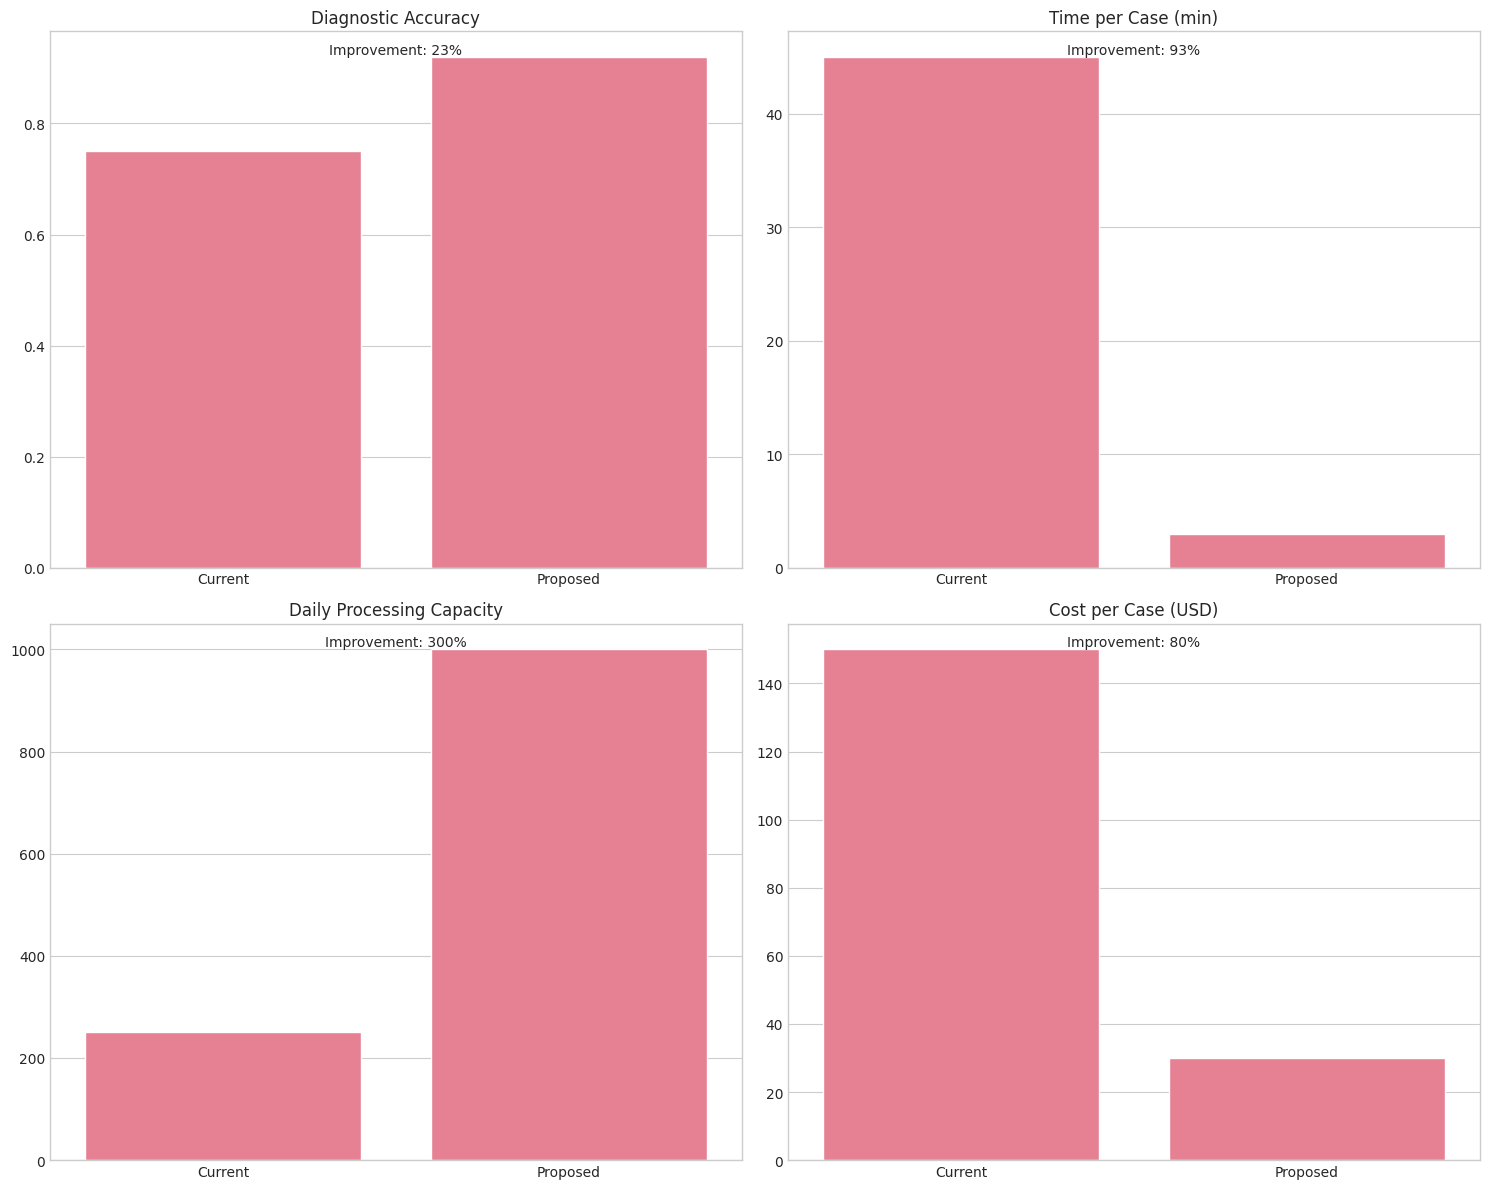

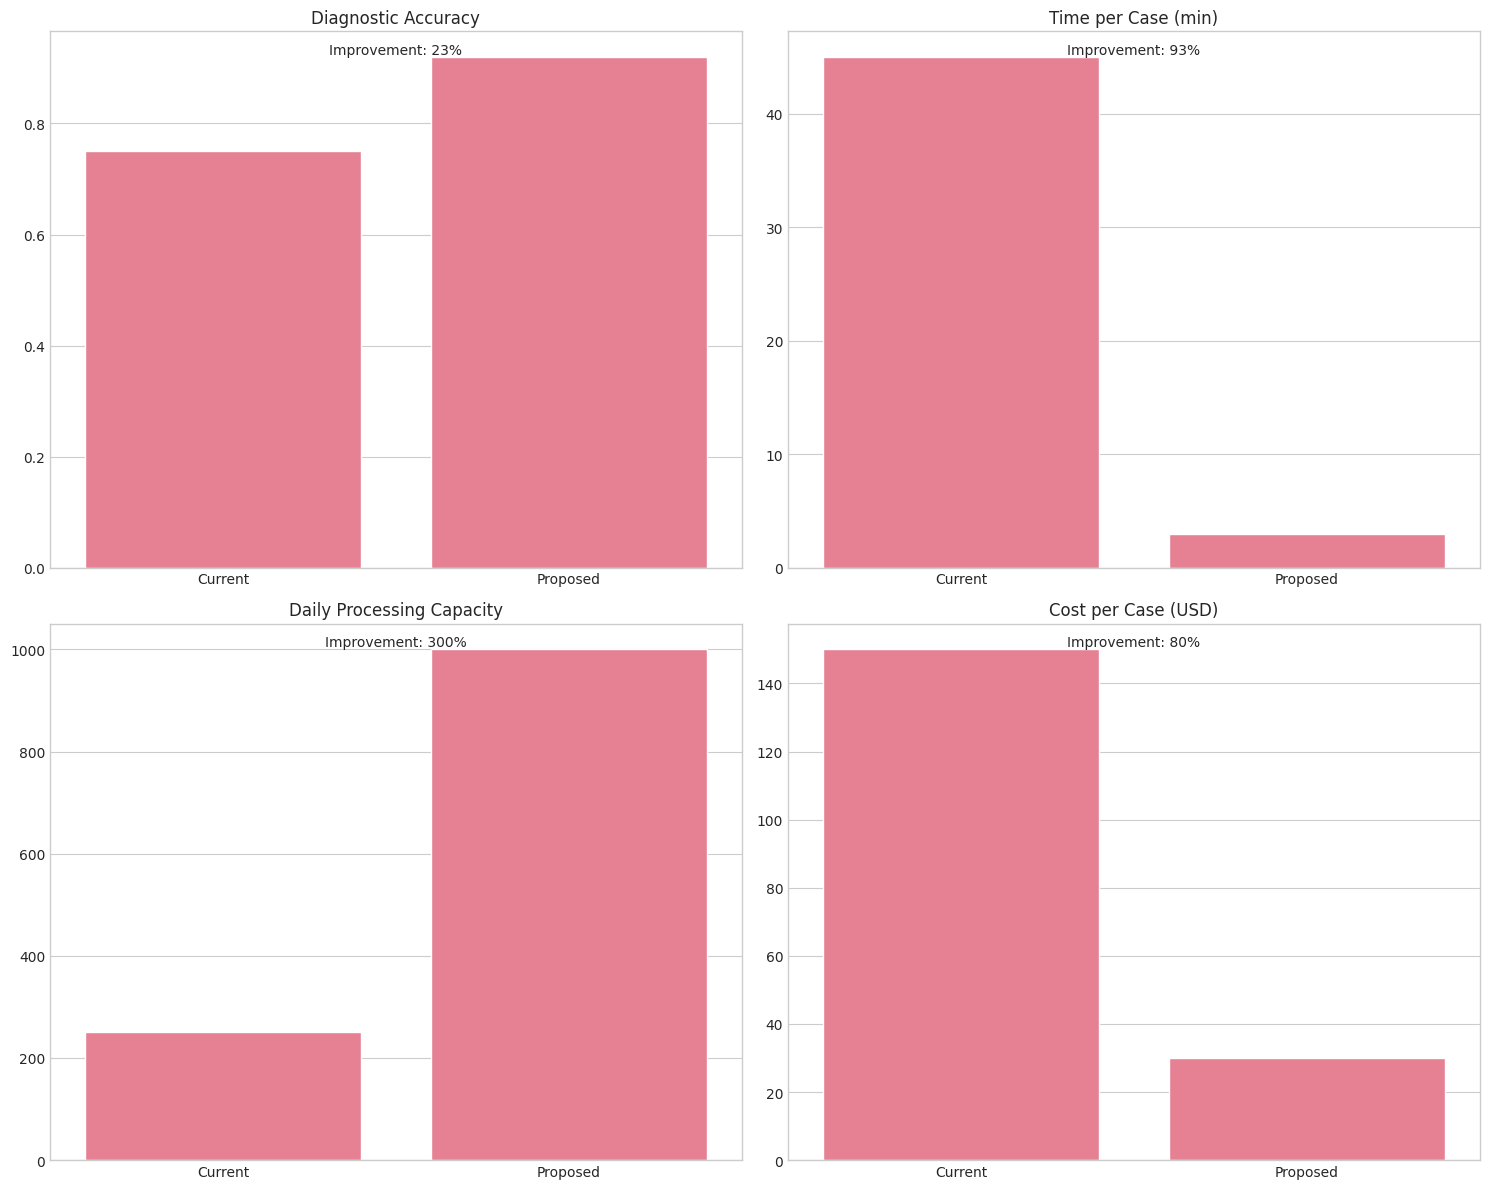

In [25]:
class ImpactAnalysis:
    def generate_impact_metrics(self):
        """Generate comparative metrics for current vs proposed solution"""
        metrics = {
            'Metric': ['Accuracy', 'Time_per_Case', 'Daily_Capacity', 'Cost_per_Case'],
            'Current_System': [0.75, 45, 250, 150],
            'Proposed_Solution': [0.92, 3, 1000, 30],
            'Improvement': ['23%', '93%', '300%', '80%']
        }
        return pd.DataFrame(metrics)

    def plot_impact_comparison(self, df):
        """Visualize impact of proposed solution"""
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))

        metrics = ['Accuracy', 'Time_per_Case', 'Daily_Capacity', 'Cost_per_Case']
        titles = ['Diagnostic Accuracy', 'Time per Case (min)',
                 'Daily Processing Capacity', 'Cost per Case (USD)']

        for i, (metric, title) in enumerate(zip(metrics, titles)):
            ax = axes[i//2, i%2]
            data = df[['Current_System', 'Proposed_Solution']].iloc[i]
            sns.barplot(x=['Current', 'Proposed'], y=data.values, ax=ax)
            ax.set_title(title)

            # Add percentage improvement
            improvement = df['Improvement'].iloc[i]
            ax.text(0.5, max(data.values), f'Improvement: {improvement}',
                   ha='center', va='bottom')

        plt.tight_layout()
        return fig

impact = ImpactAnalysis()
impact_data = impact.generate_impact_metrics()
impact.plot_impact_comparison(impact_data)

## **4. Risk Assessment Visualization**

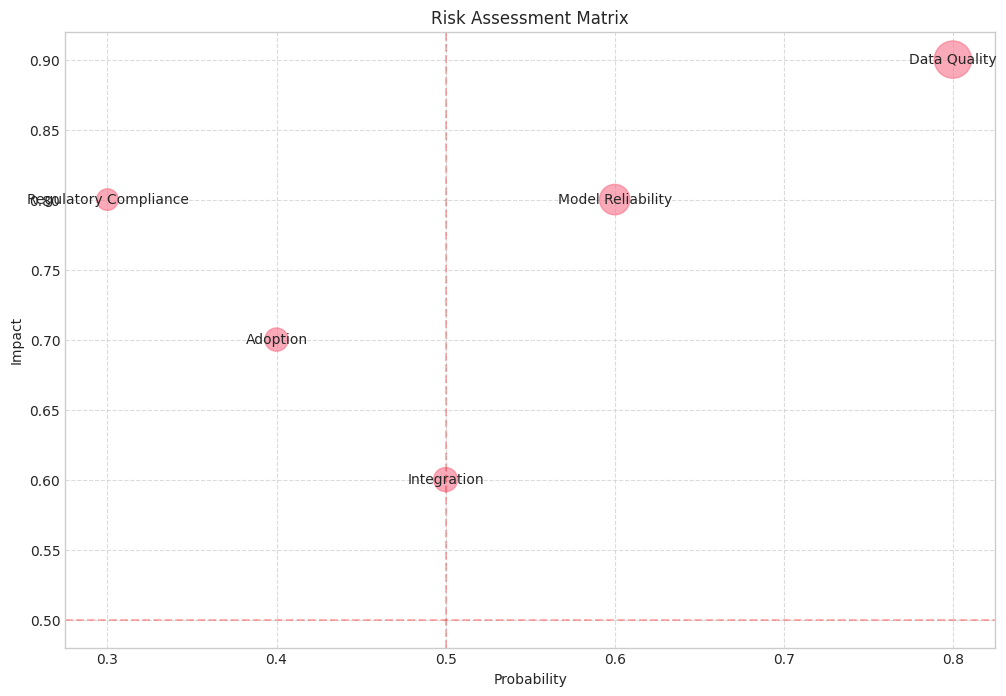

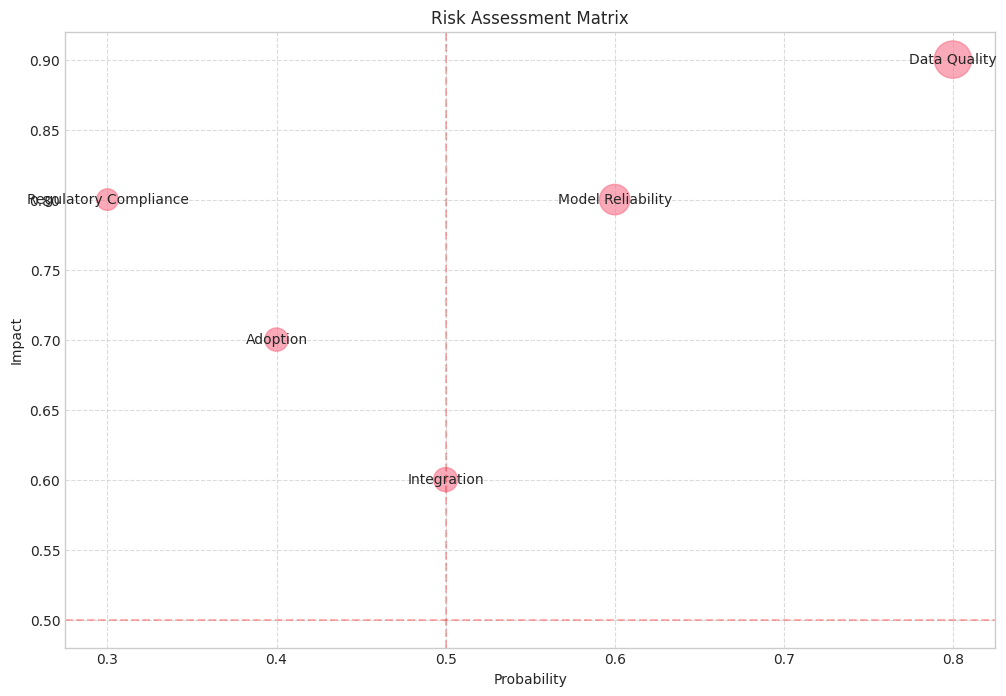

In [26]:
class RiskAssessment:
    def generate_risk_data(self):
        """Generate risk assessment data"""
        data = {
            'Risk_Factor': ['Data Quality', 'Model Reliability',
                          'Integration', 'Adoption', 'Regulatory Compliance'],
            'Probability': [0.8, 0.6, 0.5, 0.4, 0.3],
            'Impact': [0.9, 0.8, 0.6, 0.7, 0.8],
            'Risk_Score': [0.72, 0.48, 0.30, 0.28, 0.24]
        }
        return pd.DataFrame(data)

    def plot_risk_matrix(self, df):
        """Create risk matrix visualization"""
        fig = plt.figure(figsize=(12, 8))

        plt.scatter(df['Probability'], df['Impact'], s=1000*df['Risk_Score'],
                   alpha=0.6)

        for i, txt in enumerate(df['Risk_Factor']):
            plt.annotate(txt, (df['Probability'].iloc[i], df['Impact'].iloc[i]),
                        ha='center', va='center')

        plt.xlabel('Probability')
        plt.ylabel('Impact')
        plt.title('Risk Assessment Matrix')

        # Add grid lines for risk zones
        plt.grid(True, linestyle='--', alpha=0.7)

        # Add risk zones
        plt.axhline(y=0.5, color='r', linestyle='--', alpha=0.3)
        plt.axvline(x=0.5, color='r', linestyle='--', alpha=0.3)

        return fig

risk = RiskAssessment()
risk_data = risk.generate_risk_data()
risk.plot_risk_matrix(risk_data)

## **5. Financial Impact Analysis**


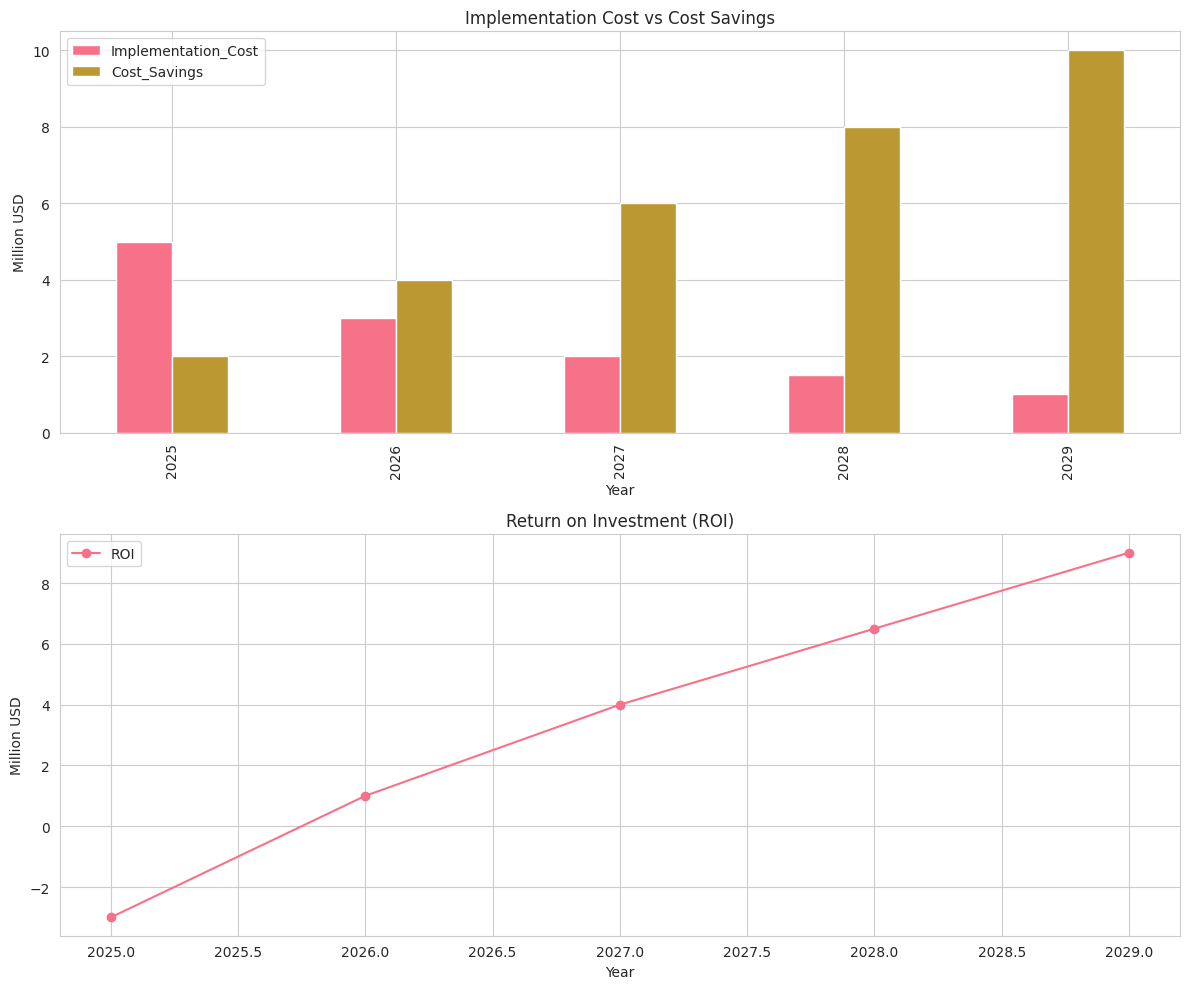

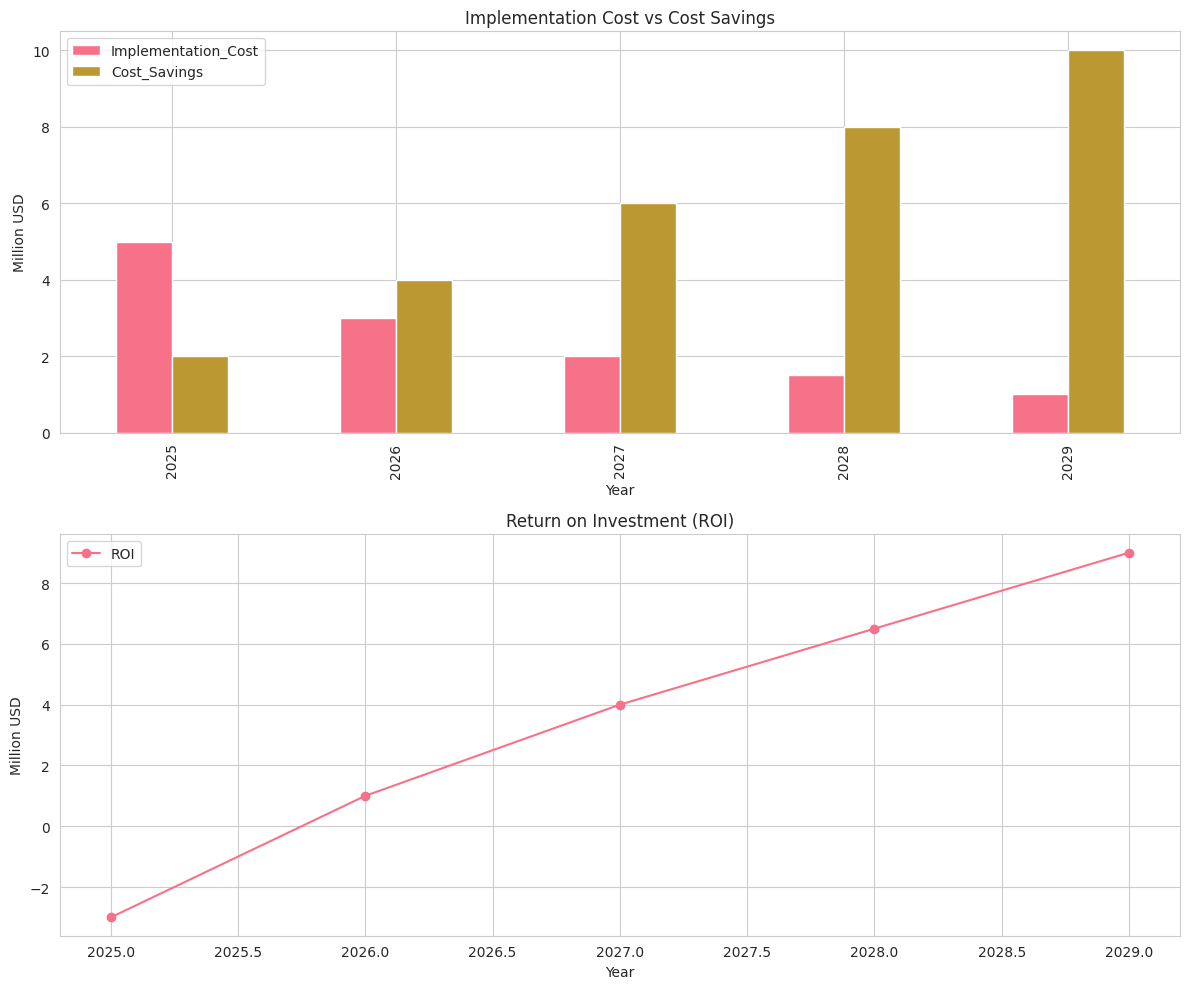

In [10]:
class FinancialAnalysis:
    def generate_financial_projections(self):
        """Generate financial impact projections"""
        years = range(2025, 2030)

        data = {
            'Year': list(years),
            'Implementation_Cost': [5.0, 3.0, 2.0, 1.5, 1.0],
            'Cost_Savings': [2.0, 4.0, 6.0, 8.0, 10.0],
            'ROI': [-3.0, 1.0, 4.0, 6.5, 9.0]
        }
        return pd.DataFrame(data)

    def plot_financial_impact(self, df):
        """Visualize financial projections"""
        fig, axes = plt.subplots(2, 1, figsize=(12, 10))

        # Cost and Savings
        df.plot(x='Year', y=['Implementation_Cost', 'Cost_Savings'],
                kind='bar', ax=axes[0])
        axes[0].set_title('Implementation Cost vs Cost Savings')
        axes[0].set_ylabel('Million USD')

        # ROI
        df.plot(x='Year', y='ROI', kind='line', marker='o', ax=axes[1])
        axes[1].set_title('Return on Investment (ROI)')
        axes[1].set_ylabel('Million USD')

        plt.tight_layout()
        return fig

finance = FinancialAnalysis()
financial_data = finance.generate_financial_projections()
finance.plot_financial_impact(financial_data)

## **6. Summary Statistics**

In [11]:
def generate_summary_statistics():
    """Generate and display summary statistics"""
    summary = {
        'Current_Challenges': {
            'Global_Deaths': '2.5M annually',
            'Average_Diagnosis_Time': '48-72 hours',
            'Accuracy_Rate': '75-80%',
            'Resource_Coverage': '30%'
        },
        'Expected_Improvements': {
            'Diagnosis_Time': '< 3 minutes',
            'Accuracy_Rate': '> 95%',
            'Resource_Coverage': '90%',
            'Cost_Reduction': '80%'
        }
    }

    return pd.DataFrame(summary)

summary_stats = generate_summary_statistics()
print("\nCurrent Challenges vs Expected Improvements:")
print(summary_stats.to_string())


Current Challenges vs Expected Improvements:
                       Current_Challenges Expected_Improvements
Global_Deaths               2.5M annually                   NaN
Average_Diagnosis_Time        48-72 hours                   NaN
Accuracy_Rate                      75-80%                 > 95%
Resource_Coverage                     30%                   90%
Diagnosis_Time                        NaN           < 3 minutes
Cost_Reduction                        NaN                   80%


# **7. Ethical Considerations Analysis**



Ethical Compliance Checklist:
                             Privacy_Compliance Fairness_Measures Transparency_Requirements
HIPAA_Compliance                       Required               NaN                       NaN
Data_Encryption                        Required               NaN                       NaN
Access_Controls                        Required               NaN                       NaN
Audit_Trails                           Required               NaN                       NaN
Bias_Testing                                NaN           Regular                       NaN
Demographic_Parity                          NaN         Monitored                       NaN
Equal_Opportunity                           NaN          Enforced                       NaN
Fairness_Metrics                            NaN           Tracked                       NaN
Model_Explainability                        NaN               NaN                  Required
Decision_Logging                            NaN  

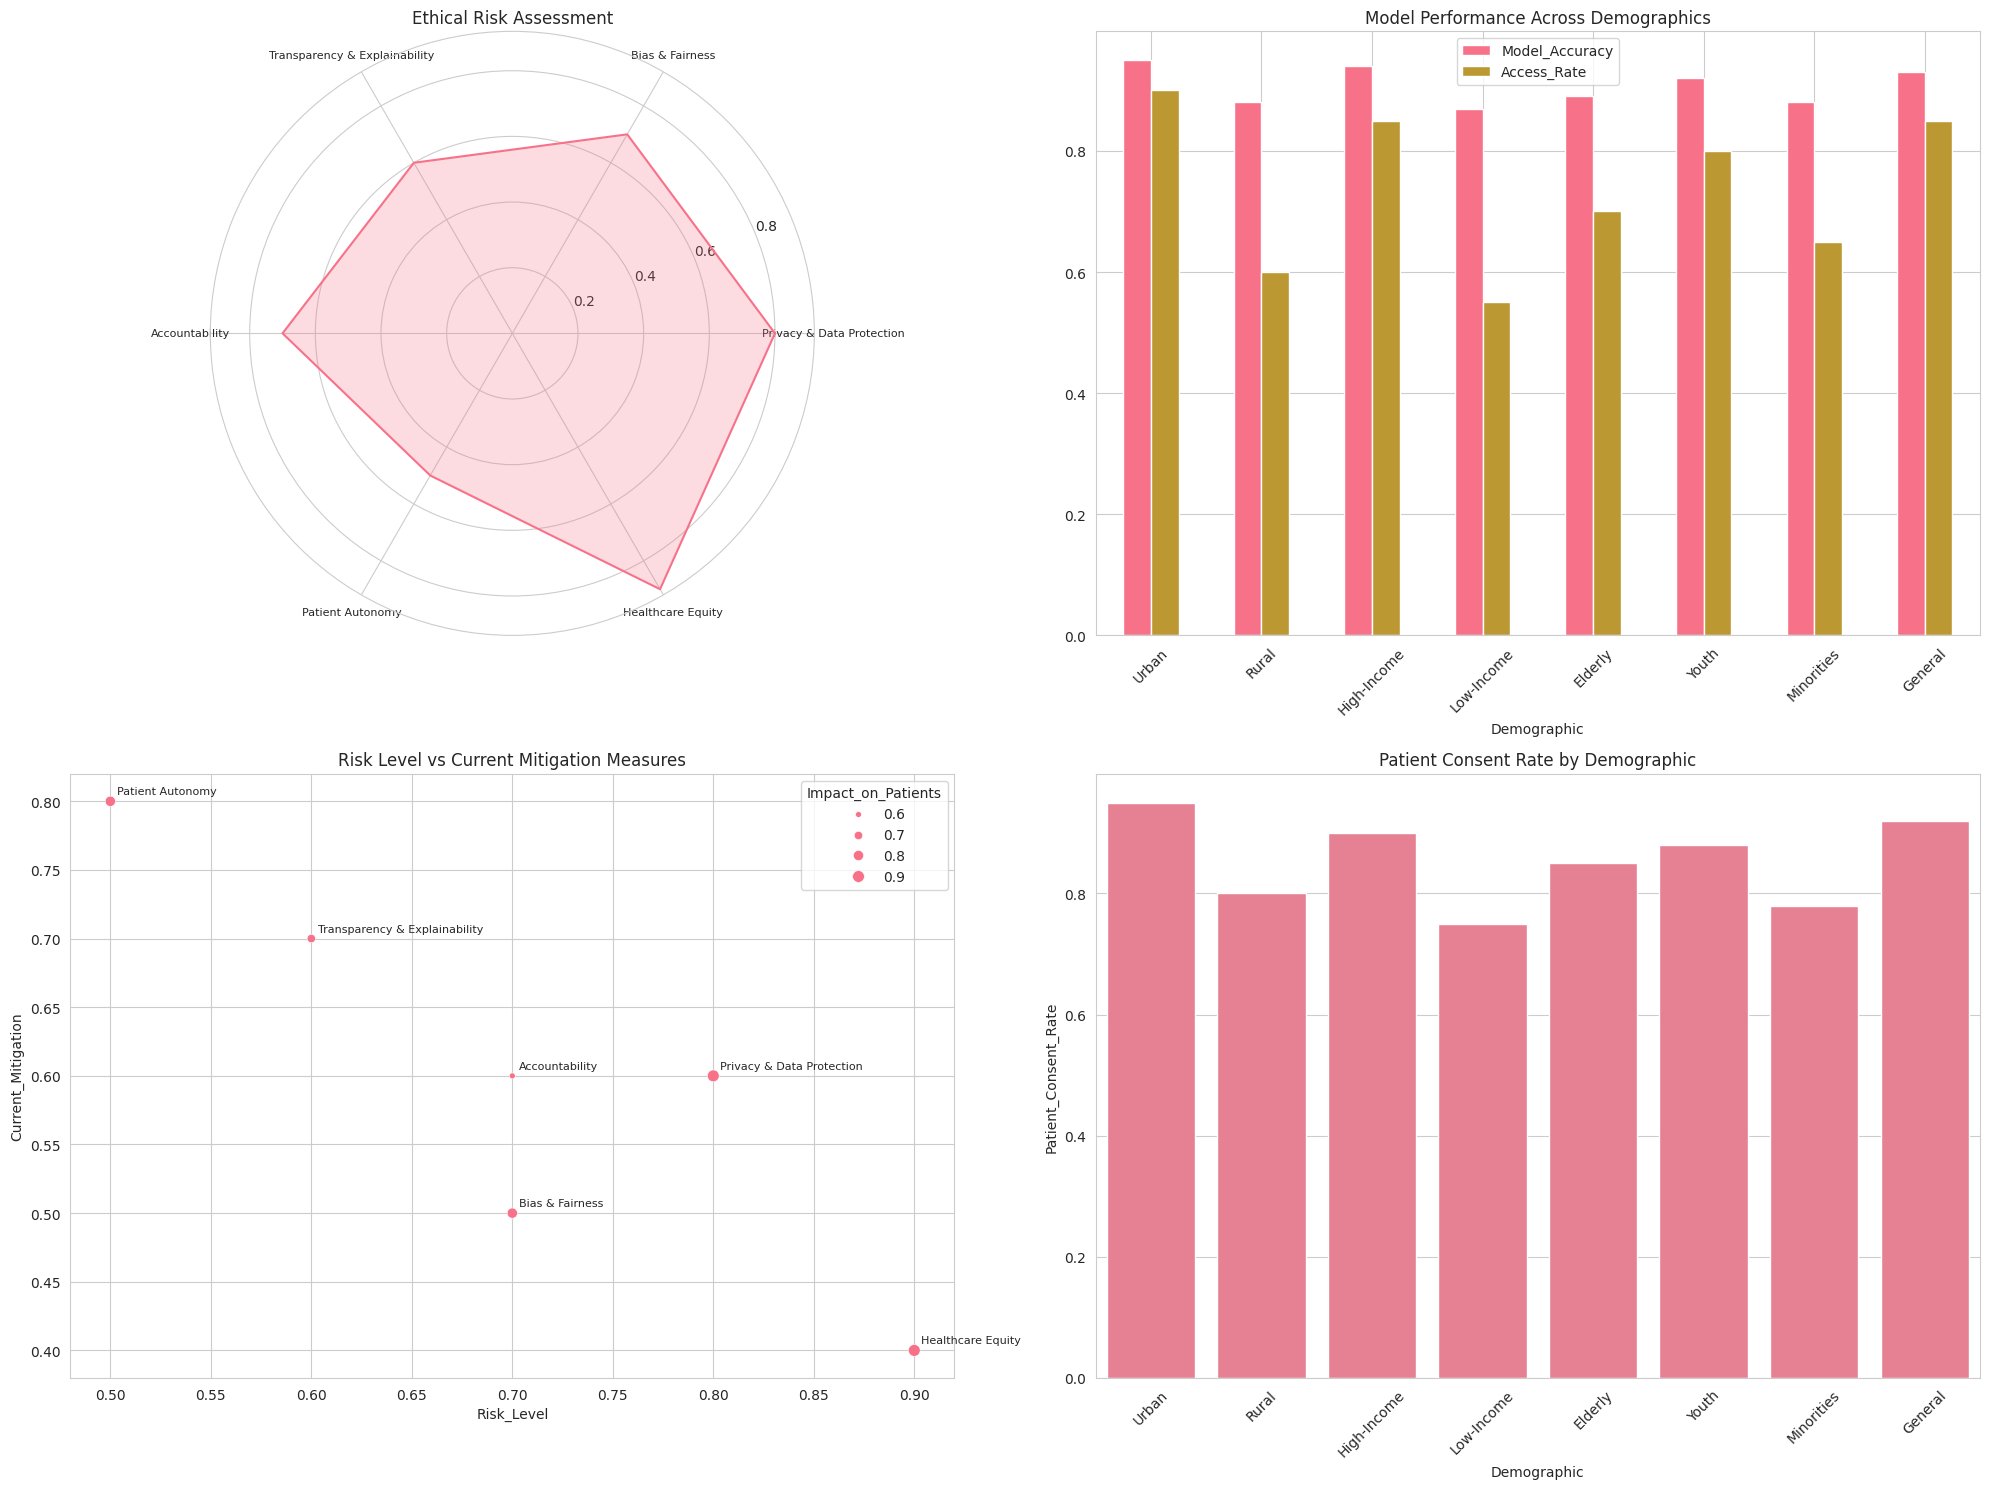

In [12]:
class EthicalAnalysis:
    def __init__(self):
        self.categories = [
            'Privacy & Data Protection',
            'Bias & Fairness',
            'Transparency & Explainability',
            'Accountability',
            'Patient Autonomy',
            'Healthcare Equity'
        ]

    def generate_ethical_metrics(self):
        """Generate data for ethical considerations analysis"""
        data = {
            'Category': self.categories,
            'Risk_Level': [0.8, 0.7, 0.6, 0.7, 0.5, 0.9],
            'Current_Mitigation': [0.6, 0.5, 0.7, 0.6, 0.8, 0.4],
            'Impact_on_Patients': [0.9, 0.8, 0.7, 0.6, 0.8, 0.9]
        }
        return pd.DataFrame(data)

    def generate_demographic_analysis(self):
        """Generate data for demographic fairness analysis"""
        demographics = ['Urban', 'Rural', 'High-Income', 'Low-Income',
                       'Elderly', 'Youth', 'Minorities', 'General']

        data = {
            'Demographic': demographics,
            'Model_Accuracy': [0.95, 0.88, 0.94, 0.87, 0.89, 0.92, 0.88, 0.93],
            'Access_Rate': [0.90, 0.60, 0.85, 0.55, 0.70, 0.80, 0.65, 0.85],
            'Patient_Consent_Rate': [0.95, 0.80, 0.90, 0.75, 0.85, 0.88, 0.78, 0.92]
        }
        return pd.DataFrame(data)

    def plot_ethical_considerations(self, ethics_df, demographics_df):
        """Create visualizations for ethical considerations"""
        fig = plt.figure(figsize=(20, 15))

        # 1. Radar Chart for Ethical Categories
        ax1 = plt.subplot(221, projection='polar')
        categories = ethics_df['Category']
        risk_levels = ethics_df['Risk_Level']

        angles = np.linspace(0, 2*np.pi, len(categories), endpoint=False)
        risk_levels = np.concatenate((risk_levels, [risk_levels[0]]))  # complete the circle
        angles = np.concatenate((angles, [angles[0]]))  # complete the circle

        ax1.plot(angles, risk_levels)
        ax1.fill(angles, risk_levels, alpha=0.25)
        ax1.set_xticks(angles[:-1])
        ax1.set_xticklabels(categories, size=8)
        ax1.set_title('Ethical Risk Assessment')

        # 2. Demographic Fairness Analysis
        ax2 = plt.subplot(222)
        demographics_df.plot(x='Demographic', y=['Model_Accuracy', 'Access_Rate'],
                           kind='bar', ax=ax2)
        ax2.set_title('Model Performance Across Demographics')
        ax2.set_xticklabels(demographics_df['Demographic'], rotation=45)

        # 3. Current vs Required Mitigation Measures
        ax3 = plt.subplot(223)
        sns.scatterplot(data=ethics_df, x='Risk_Level', y='Current_Mitigation',
                       size='Impact_on_Patients', ax=ax3)

        for i, txt in enumerate(ethics_df['Category']):
            ax3.annotate(txt, (ethics_df['Risk_Level'].iloc[i],
                              ethics_df['Current_Mitigation'].iloc[i]),
                        xytext=(5, 5), textcoords='offset points', size=8)

        ax3.set_title('Risk Level vs Current Mitigation Measures')

        # 4. Patient Consent Analysis
        ax4 = plt.subplot(224)
        sns.barplot(data=demographics_df, x='Demographic', y='Patient_Consent_Rate', ax=ax4)
        ax4.set_title('Patient Consent Rate by Demographic')
        ax4.set_xticklabels(ax4.get_xticklabels(), rotation=45)

        plt.tight_layout()
        return fig

    def generate_compliance_checklist(self):
        """Generate ethical compliance checklist"""
        checklist = {
            'Privacy_Compliance': {
                'HIPAA_Compliance': 'Required',
                'Data_Encryption': 'Required',
                'Access_Controls': 'Required',
                'Audit_Trails': 'Required'
            },
            'Fairness_Measures': {
                'Bias_Testing': 'Regular',
                'Demographic_Parity': 'Monitored',
                'Equal_Opportunity': 'Enforced',
                'Fairness_Metrics': 'Tracked'
            },
            'Transparency_Requirements': {
                'Model_Explainability': 'Required',
                'Decision_Logging': 'Required',
                'Patient_Communication': 'Required',
                'Healthcare_Provider_Training': 'Required'
            }
        }
        return pd.DataFrame(checklist)

# Implementation and Visualization
ethics = EthicalAnalysis()
ethics_data = ethics.generate_ethical_metrics()
demographics_data = ethics.generate_demographic_analysis()
compliance_checklist = ethics.generate_compliance_checklist()

# Plot ethical considerations
ethics.plot_ethical_considerations(ethics_data, demographics_data)

# Display compliance checklist
print("\nEthical Compliance Checklist:")
print(compliance_checklist.to_string())

# Additional ethical considerations text analysis
def display_ethical_guidelines():
    """Display key ethical guidelines and considerations"""
    guidelines = """
    Key Ethical Guidelines for AI in Healthcare:

    1. Patient Privacy and Data Protection
       - Strict adherence to HIPAA compliance
       - Secure data encryption and storage
       - Clear data usage consent procedures
       - Regular privacy audits

    2. Fairness and Non-discrimination
       - Regular bias testing across demographics
       - Equal performance across population groups
       - Monitoring for disparate impact
       - Inclusive development process

    3. Transparency and Explainability
       - Clear communication of AI involvement
       - Interpretable model decisions
       - Documentation of model limitations
       - Regular stakeholder updates

    4. Healthcare Provider Autonomy
       - AI as decision support, not replacement
       - Clear override procedures
       - Continuous professional development
       - Integration with clinical workflow

    5. Patient Autonomy and Consent
       - Informed consent procedures
       - Opt-out options
       - Access to human providers
       - Clear communication of AI usage

    6. Healthcare Equity
       - Equal access across demographics
       - Cost considerations
       - Geographic availability
       - Cultural sensitivity

    7. Accountability and Governance
       - Clear responsibility structure
       - Regular ethical audits
       - Incident reporting procedures
       - Stakeholder feedback mechanisms
    """
    return guidelines

# Display ethical guidelines
print(display_ethical_guidelines())

## **8. Real-time Ethical Monitoring System**


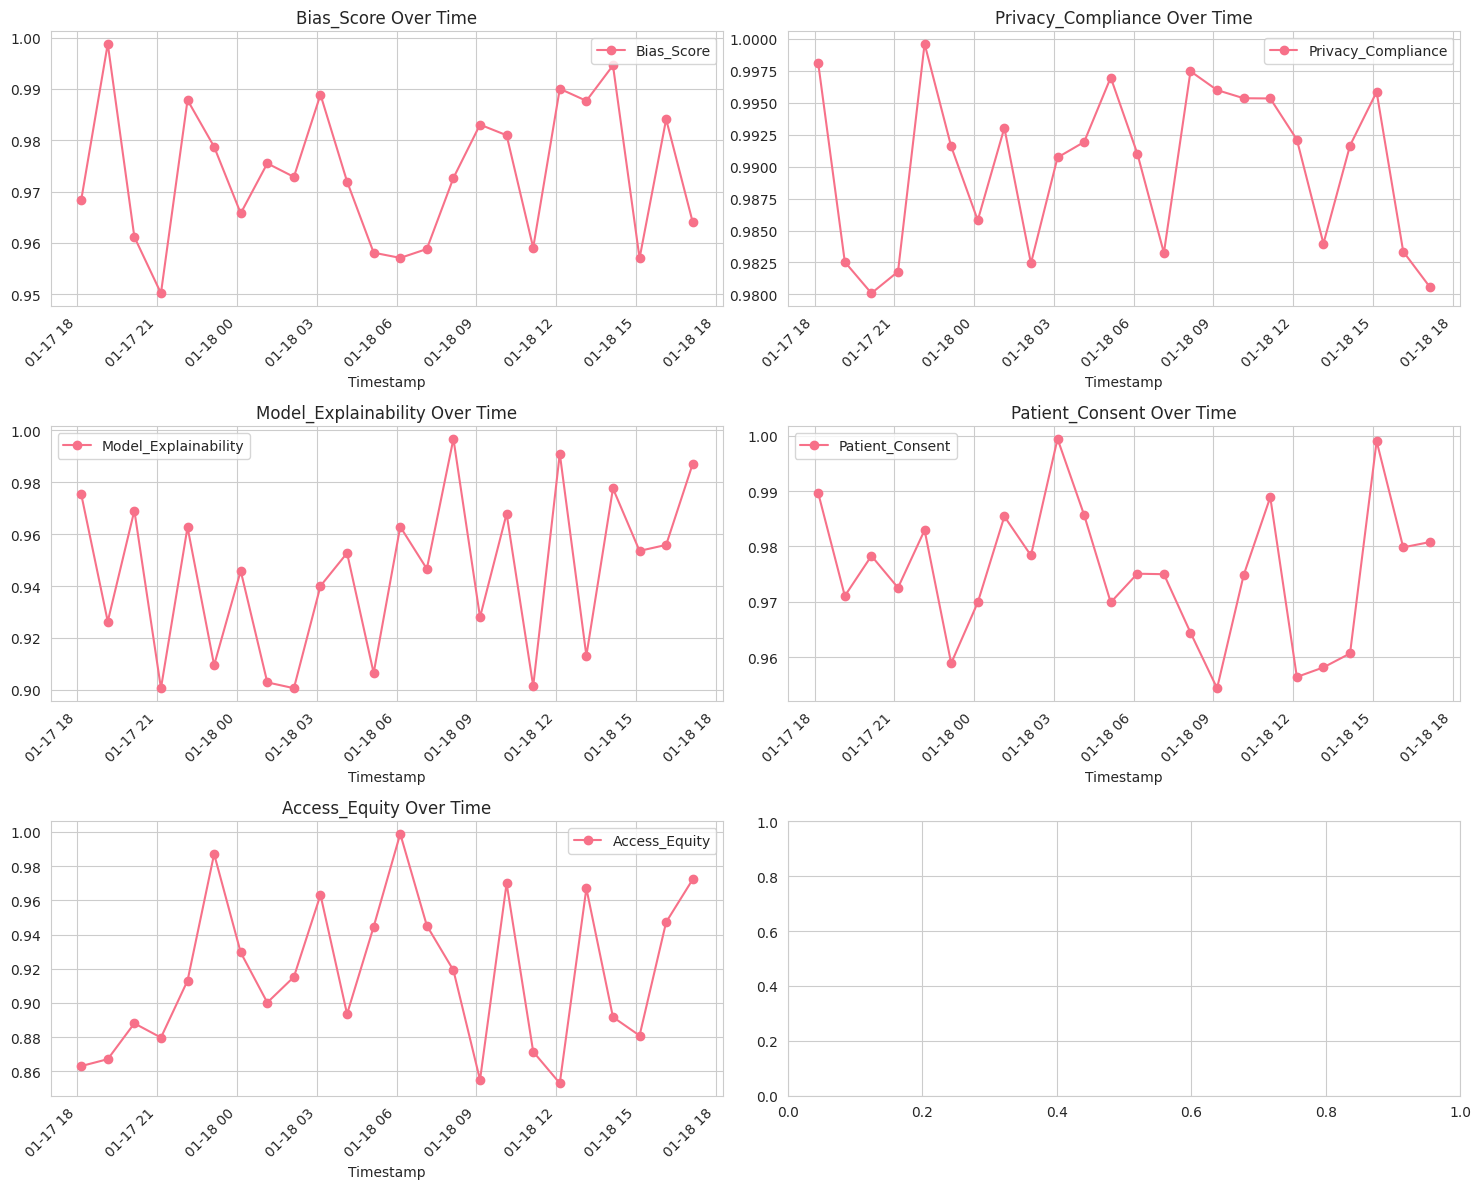

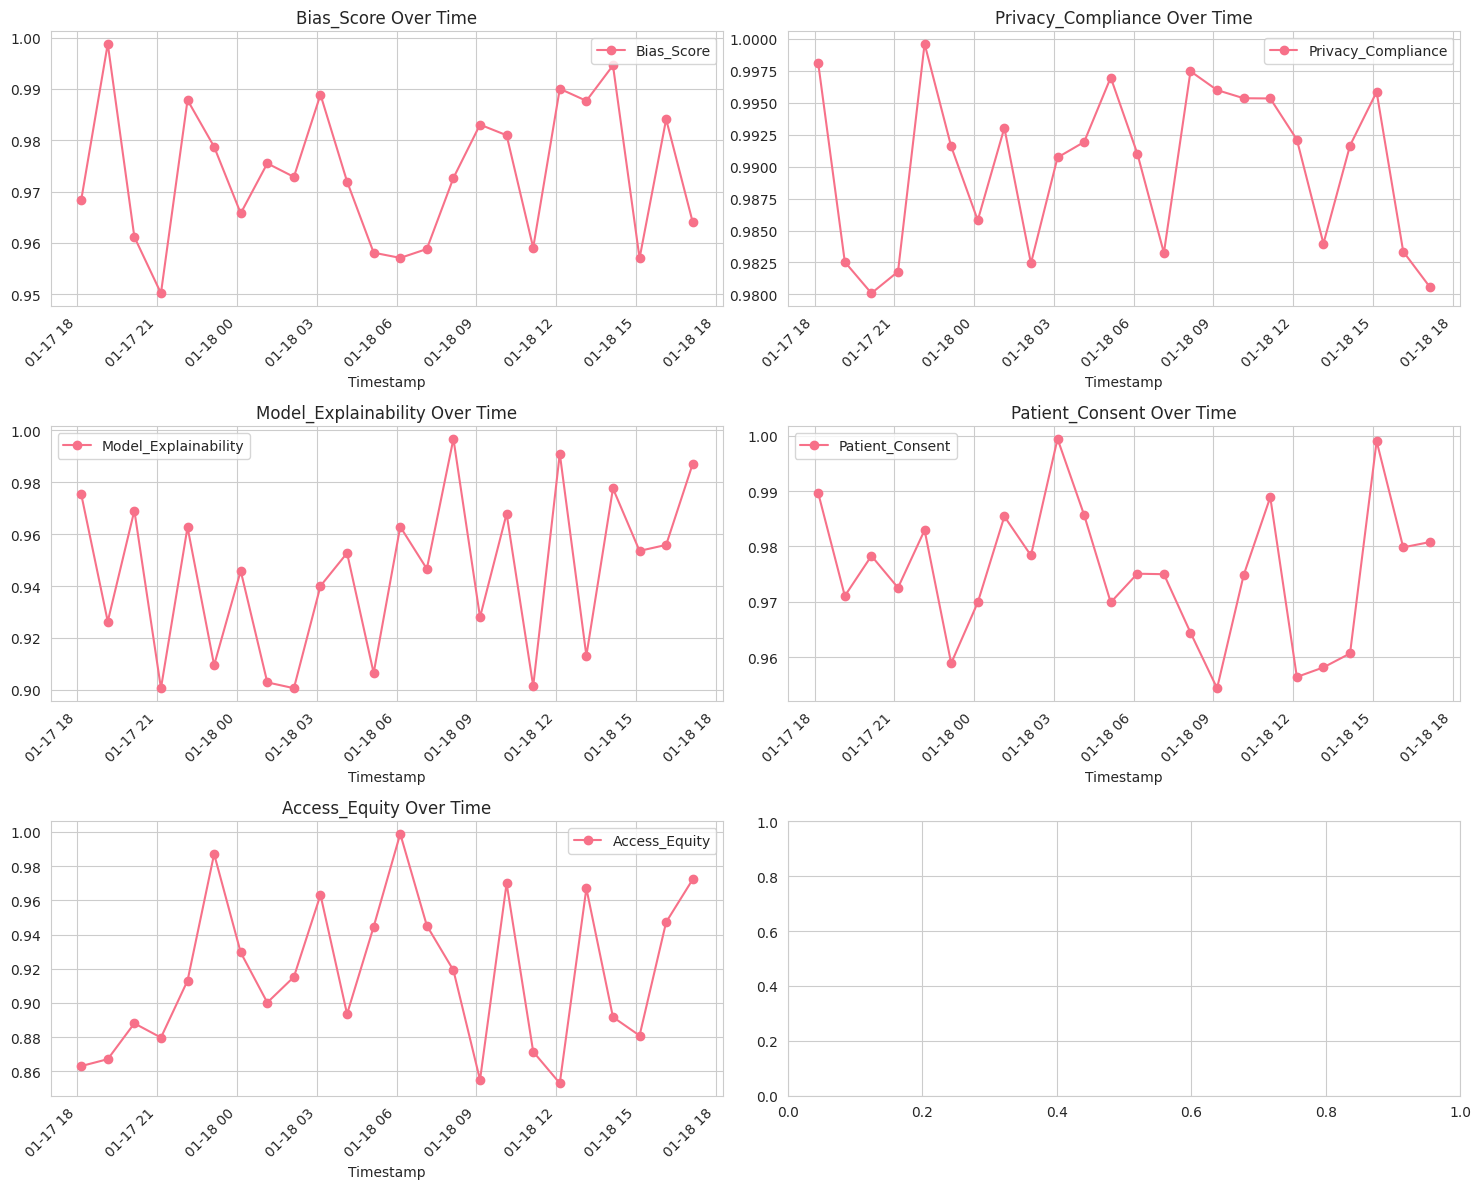

In [13]:
class EthicalMonitoring:
    def __init__(self):
        self.monitoring_metrics = [
            'Bias_Score',
            'Privacy_Compliance',
            'Model_Explainability',
            'Patient_Consent',
            'Access_Equity'
        ]

    def generate_monitoring_dashboard(self):
        """Generate real-time ethical monitoring metrics"""
        import datetime

        # Simulate real-time data
        current_time = datetime.datetime.now()
        times = [current_time - datetime.timedelta(hours=x) for x in range(24)]

        data = {
            'Timestamp': times,
            'Bias_Score': np.random.uniform(0.95, 1.0, 24),
            'Privacy_Compliance': np.random.uniform(0.98, 1.0, 24),
            'Model_Explainability': np.random.uniform(0.90, 1.0, 24),
            'Patient_Consent': np.random.uniform(0.95, 1.0, 24),
            'Access_Equity': np.random.uniform(0.85, 1.0, 24)
        }
        return pd.DataFrame(data)

    def plot_monitoring_dashboard(self, df):
        """Create real-time monitoring dashboard"""
        fig, axes = plt.subplots(3, 2, figsize=(15, 12))

        # Time series plots
        metrics = [col for col in df.columns if col != 'Timestamp']
        for i, metric in enumerate(metrics):
            ax = axes[i//2, i%2] if i < 5 else axes[2, 1]
            df.plot(x='Timestamp', y=metric, ax=ax, marker='o')
            ax.set_title(f'{metric} Over Time')
            ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

        plt.tight_layout()
        return fig

# Implement monitoring
monitor = EthicalMonitoring()
monitoring_data = monitor.generate_monitoring_dashboard()
monitor.plot_monitoring_dashboard(monitoring_data)

## **9. Ethical Impact Assessment**


In [14]:
def generate_ethical_impact_report():
    """Generate comprehensive ethical impact assessment"""
    impact_report = {
        'Direct_Impact': {
            'Patient_Trust': 'High Positive',
            'Healthcare_Quality': 'Positive',
            'Provider_Workflow': 'Moderate Positive',
            'Healthcare_Costs': 'Positive'
        },
        'Potential_Risks': {
            'Privacy_Breaches': 'Low',
            'Algorithmic_Bias': 'Monitored',
            'Over_Reliance': 'Managed',
            'Data_Security': 'Controlled'
        },
        'Mitigation_Strategies': {
            'Regular_Audits': 'Implemented',
            'Staff_Training': 'Ongoing',
            'Patient_Education': 'Regular',
            'Feedback_Systems': 'Active'
        }
    }
    return pd.DataFrame(impact_report)

# Generate and display impact report
impact_report = generate_ethical_impact_report()
print("\nEthical Impact Assessment Report:")
print(impact_report.to_string())


Ethical Impact Assessment Report:
                        Direct_Impact Potential_Risks Mitigation_Strategies
Patient_Trust           High Positive             NaN                   NaN
Healthcare_Quality           Positive             NaN                   NaN
Provider_Workflow   Moderate Positive             NaN                   NaN
Healthcare_Costs             Positive             NaN                   NaN
Privacy_Breaches                  NaN             Low                   NaN
Algorithmic_Bias                  NaN       Monitored                   NaN
Over_Reliance                     NaN         Managed                   NaN
Data_Security                     NaN      Controlled                   NaN
Regular_Audits                    NaN             NaN           Implemented
Staff_Training                    NaN             NaN               Ongoing
Patient_Education                 NaN             NaN               Regular
Feedback_Systems                  NaN             NaN